In [1]:
# imports
import numpy as np

from commstools.core import Signal
from commstools.impairments import add_awgn
from commstools.plotting import filter_response


2026-02-18 12:42:20 [INFO] [commstools/backend.py] CuPy is available and functional, defaulting Signals to GPU.


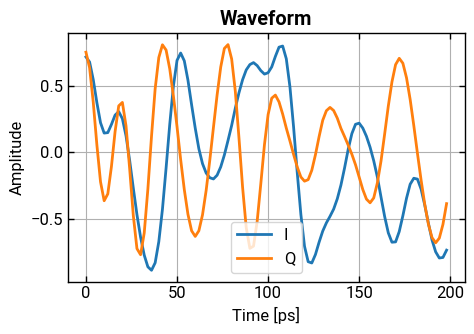

,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation (Scheme/Order),QAM / 16
3,Symbol Rate,100.00 GBaud
4,Bit Rate,400.00 Gbps
5,Sampling Rate,500.00 GHz
6,Samples Per Symbol,5.00
7,Pulse Shape,RRC
8,Duration,10.00 µs
9,Center Frequency,0.00 Hz


In [2]:
symbol_rate = 100e9
sampling_rate = 500e9
sps = int(sampling_rate / symbol_rate)

sig_4qam = Signal.qam(
    order=16,
    num_symbols=1_000_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="rrc",
    seed=42,
)
sig_4qam.plot_symbols(num_symbols=20, show=True)
sig_4qam.print_info()


In [3]:
sig_4qam.to("gpu")
# sig_4qam.backend


Signal(samples=array([ 0.71745182+0.75311675j,  0.67938781+0.63663301j,
        0.54709546+0.37812229j, ..., -0.02804261+0.59471487j,
       -0.03094704+0.35214208j, -0.03827754+0.09990148j], shape=(5000000,)), sampling_rate=500000000000.0, symbol_rate=100000000000.0, mod_scheme='QAM', mod_order=16, mod_unipolar=False, mod_rz=False, source_bits=array([1, 0, 1, ..., 1, 1, 0], shape=(4000000,), dtype=int8), source_symbols=array([ 0.948721 +0.948721j ,  0.3162403-0.3162403j,
        0.3162403+0.3162403j, ...,  0.948721 -0.3162403j,
       -0.948721 -0.948721j , -0.3162403+0.948721j ],
      shape=(1000000,), dtype=complex64), pulse_shape='rrc', filter_span=10, rrc_rolloff=0.35, rc_rolloff=0.35, gaussian_bt=0.3, smoothrect_bt=1.0, spectral_domain='BASEBAND', physical_domain='DIG', center_frequency=0, digital_frequency_offset=0, signal_info=None)

In [4]:
jsamples = sig_4qam.export_samples_to_jax()


W0218 12:42:22.185928   38364 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0218 12:42:22.187751   38246 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.


In [5]:
jsamples.device


CudaDevice(id=0)

In [6]:
import jax

cpu_device = jax.devices("cpu")[0]
jsamples = jax.device_put(jsamples, cpu_device)
jsamples.device


CpuDevice(id=0)

In [7]:
jsamples = jsamples.at[0].set(10)


In [8]:
sig_4qam.update_samples_from_jax(jsamples)


Signal(samples=array([10.        +0.j        ,  0.6793878 +0.63663304j,
        0.5470955 +0.3781223j , ..., -0.02804261+0.5947149j ,
       -0.03094704+0.3521421j , -0.03827754+0.09990148j],
      shape=(5000000,), dtype=complex64), sampling_rate=500000000000.0, symbol_rate=100000000000.0, mod_scheme='QAM', mod_order=16, mod_unipolar=False, mod_rz=False, source_bits=array([1, 0, 1, ..., 1, 1, 0], shape=(4000000,), dtype=int8), source_symbols=array([ 0.948721 +0.948721j ,  0.3162403-0.3162403j,
        0.3162403+0.3162403j, ...,  0.948721 -0.3162403j,
       -0.948721 -0.948721j , -0.3162403+0.948721j ],
      shape=(1000000,), dtype=complex64), pulse_shape='rrc', filter_span=10, rrc_rolloff=0.35, rc_rolloff=0.35, gaussian_bt=0.3, smoothrect_bt=1.0, spectral_domain='BASEBAND', physical_domain='DIG', center_frequency=0, digital_frequency_offset=0, signal_info=None)

In [9]:
sig_4qam.print_info()


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation (Scheme/Order),QAM / 16
3,Symbol Rate,100.00 GBaud
4,Bit Rate,400.00 Gbps
5,Sampling Rate,500.00 GHz
6,Samples Per Symbol,5.00
7,Pulse Shape,RRC
8,Duration,10.00 µs
9,Center Frequency,0.00 Hz


(<Figure size 500x350 with 1 Axes>,
 <Axes: title={'center': 'Waveform'}, xlabel='Time [ps]', ylabel='Amplitude'>)

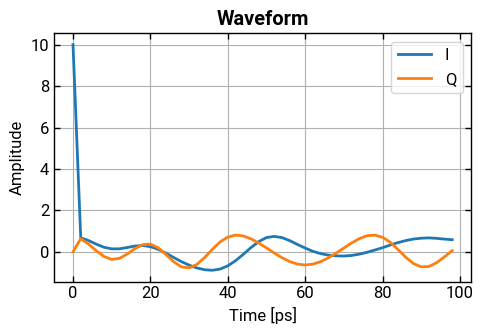

In [10]:
sig_4qam.plot_symbols(num_symbols=10)


In [11]:
import numpy as np
import cupy as cp


In [12]:
cp.dtype("complex64")


dtype('complex64')

In [13]:
print(cp.complex64)


<class 'numpy.complex64'>


In [14]:
cp.dtype("complex64") == cp.complex64


True

In [15]:
import jax.numpy as jnp


In [16]:
jnp.dtype("complex64") == cp.complex64


True

In [17]:
arr = cp.array([1, 2])


In [18]:
arr


array([1, 2])

In [19]:
arr.astype(np.complex64)


array([1.+0.j, 2.+0.j], dtype=complex64)

In [20]:
int(arr[0])


1

In [21]:
np.zeros(10, dtype="complex64")


array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j], dtype=complex64)